# Project: Nearly New Nautical 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction




> **Descriptions:** This dataset has information about Nearly New Nautical which is a website that allows users to advertise their used boats for sale. The marketing team is preparing a weekly newsletter for boat owners.
The newsletter is designed to help sellers to get more views of their boat, as well as
stay on top of market trends. The main target is to take a look at the recent data and help the company to learn more about the characteristics of the most viewed boat listings in the last 7 days.


 **dataset columns description:**

- **Price**: Character, boat price listed in different currencies (e.g. EUR, Â£, CHF etc) on the website.
- **Boat Type**: Character, type of the boat.
- **Manufacturer**: Character, manufacturer of the boat.
- **Type**: Character, condition of the boat and engine type(e.g. Diesel, Unleaded, etc).
- **Year Built**: Numeric, year of the boat built.
- **Length**: Numeric, length in meter of the boat.
- **Width**: Numeric, width in meter of the boat.
- **Material**: Character, material of the boat (e.g. GRP, PVC, etc).
- **Location**: Character, location of the boat is listed.
- **Number of views last 7 days**: Numeric, number of the views of the list last 7 days.


## **Questions:**


* Do the most expensive boats get the most views?  
* Which boat type has the most views on average?
* Which boat and engine condition has the most views on average?
* Which boat material has the most views on average?
* Are there common features among the most viewed boats?


### importing libraries that will be used to investigate Dataset

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
sns.set_style("whitegrid")
pd.set_option('display.max_rows', 10000)
import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

 **This is a three step process:**

*  Gathering the data from Dataset and investegate it trying to understand more details about it. 


*  Assessing data to identify any issues with data types, structure, or quality.


*  Cleaning data by changing data types, replacing values, removing unnecessary data and modifying Dataset for easy and fast analysis.


### Gathering Data

In [14]:
# loading CSV file in to  Dataframes  //df//

df = pd.read_csv("boat_data.csv")

In [16]:
#checking 5 rows sample from Dataframe

df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


### Assessing Data

In [17]:
# checking Dataframe basic informations (columns names, number of values, data types ......)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [18]:
#checking Dataframe shape (number of rows and columns)

df.shape

(9888, 10)

In [19]:
#checking more information and descriptive statistics (Quantitative values)

df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


In [20]:
#checking more information and descriptive statistics (Categorical values)

df.describe(include="O")

,Price,Boat Type,Manufacturer,Type,Material,Location
count,9888,9888,8550,9882,8139,9852
unique,3182,126,910,24,11,2995
top,EUR 65000,Motor Yacht,BÃ©nÃ©teau power boats,"Used boat,Diesel",GRP,Netherlands Â» In verkoophaven
freq,77,2720,631,4140,5484,309


In [21]:
# checking for NaN values patients

df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [22]:
# checking for NaN values patients

df.isnull().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [23]:
#checking for duplicated rows 

df.duplicated().sum()

0

In [24]:
#checking Material value counts 

df["Material"].value_counts().sort_index()

Aluminium               229
Carbon Fiber             30
GRP                    5484
Hypalon                   5
PVC                    1123
Plastic                  77
Reinforced concrete       1
Rubber                    1
Steel                   939
Thermoplastic            15
Wood                    235
Name: Material, dtype: int64

In [27]:
# check Year Built column observations with 0 values count

df[df["Year Built"] ==0].count()[0]

551

##  Cleaning Data

### <font color='blue'>Missing Data</font>

 



 
1. There are a lot of empty values on this data set (Nans) especially on Manufacturing and Material columns.
2. The minimum boat width is 0.01 Meter which is obviously a typo issue.
3. There are 551 observations with value 0 on Year Built column.

**We can not drop or replace any of these values so I am going to keep them just like that, but it's important to give these variables more attention in the future.These points may affect our results accuracy so we need to pay attention to such mistakes.**


### <font color='blue'>Quality issues</font>

1. Change columns names by removing spaces and make them in lower case for easy use and readability.
2. Remove currency abbreviations from Price column.
3. Change price column data type into Integer and Convert all currencies into one currency `Euro`. 
4. Change price column name into (price_in_euro).
5. Change Type column data type into category for saving memory.
6. Change Material data type into category for saving memory.
7. Add a new column with price levels (low, medium, high and very high) depending on minimum, 1st quartile, median, 3rd quartile and maximum.
8. Add new column with views levels (low, medium, high and very high) depending on minimum, 1st quartile, median, 3rd quartile and maximum.
9. Change Boat Type column data type into category for saving memory.

In [28]:
# make copy of origenal dataframes to clean them

df_clean = df.copy()

### <font color='blue'>Fixing Quality issues</font>

#### 1.  Change columns names by removing spaces and make them on lower case for easy use and readability.

##### Solution
* Change columns names using df.rename and `lambda` function.

##### Code

In [29]:
# replace spaces with "_"

df_clean = df_clean.rename(columns= lambda x: x.replace(" ", "_").lower())

##### Test

In [30]:
# confirm columns names already changed 

df_clean.columns

Index(['price', 'boat_type', 'manufacturer', 'type', 'year_built', 'length',
       'width', 'material', 'location', 'number_of_views_last_7_days'],
      dtype='object')

#### 2.  Remove currency abbreviations from Price column.

##### Solution
* split price column values into 2 columns price and currency using `split()` method.

##### Code

In [31]:
df_clean["currency"] = df_clean.price.apply(lambda x : x.split(" ")[0])
df_clean.price = df_clean.price.apply(lambda x : x.split(" ")[1])

##### Test

In [32]:
# confirming changes

df_clean["currency"].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [33]:
df_clean.price.sample(5)

8835     29900
5413    185000
1754     99000
6087    125000
7661     56900
Name: price, dtype: object

#### 3. Change price column data type into Integer and Convert all currencies into one currency `Euro`. 

##### Solution
* Replace all currency with it's value in Euro using `.replace()` method then convert each currency into Euro. 

##### Code

In [34]:
# making dictionary with each currency value in euro

price_dic = {"EUR":1,    
             "CHF": 0.99,  
             "Â£": 1.20,
             "DKK": 0.13}

df_clean.currency = df_clean.currency.replace(price_dic)

In [35]:
df_clean.price = df_clean.price.astype(int)
df_clean.price = df_clean.price * df_clean.currency

##### Test

In [36]:
df_clean.price.sample(5)

4438     355000.0
4998     240000.0
3479    1900000.0
7792      54000.0
9119      24495.0
Name: price, dtype: float64

#### 4. Change price column name into (price_in_euro)


##### Solution
* change column name using `.rename()`

##### Code

In [37]:
df_clean = df_clean.rename(columns = {"price": "price_in_euro"})

In [38]:
# Drop currency column 

df_clean = df_clean.drop("currency", axis="columns")

##### Test

In [39]:
# Confirming changes 

df_clean.columns

Index(['price_in_euro', 'boat_type', 'manufacturer', 'type', 'year_built',
       'length', 'width', 'material', 'location',
       'number_of_views_last_7_days'],
      dtype='object')

#### 5. Change Type column data type into category for saving memory.

##### Solution
* Change data type using `.astype()`

##### Code

In [40]:
df_clean.type = df_clean.type.astype("category") 

##### Test

In [41]:
# Confirm 

df_clean.type.nbytes

10080

#### 6. Change Material data type into category for saving memory.

##### Solution
* change data type using `.astype()`

##### Code

In [42]:
df_clean.material = df_clean.material.astype("category") 

##### Test

In [43]:
# Confirm

df_clean.material.nbytes

9976

#### 7. Add new column with price levels (low, medium, high and very high) depending on minimum, 1st quartile, median, 3rd quartile and maximum.

##### Solution
* make new column using `.cut()` function.

##### Code

In [44]:
# check info about price column 

df_clean.price_in_euro.describe()

count    9.888000e+03
mean     3.034915e+05
std      9.737574e+05
min      3.224000e+03
25%      4.299000e+04
50%      9.227445e+04
75%      2.480000e+05
max      3.100000e+07
Name: price_in_euro, dtype: float64

In [45]:
mini = df_clean.price_in_euro.min()
first_q = df_clean.price_in_euro.quantile(0.25)
third_q = df_clean.price_in_euro.quantile(0.75)
med = df_clean.price_in_euro.median()
maxi = df_clean.price_in_euro.max()

In [46]:
bins = [mini, first_q, med, third_q, maxi]
labls = ["Low", "Medium", "High", "Very High"]
df_clean["price_level"] = pd.cut(df_clean.price_in_euro, bins, labels = labls, include_lowest=True, right=True)

##### Test

In [47]:
# Confirming changes 

df_clean.price_level.value_counts()

High         2474
Low          2473
Medium       2471
Very High    2470
Name: price_level, dtype: int64

#### 8. Add new column with views levels (low, medium, high and very high) depending on minimum, 1st quartile, median, 3rd quartile and maximum.

##### Solution
* make new column using `.cut()` function.

##### Code

In [48]:
# check info about price column 

df_clean.number_of_views_last_7_days.describe()

count    9888.000000
mean      149.160801
std       151.819752
min        13.000000
25%        70.000000
50%       108.000000
75%       172.000000
max      3263.000000
Name: number_of_views_last_7_days, dtype: float64

In [49]:
v_mini = df_clean.number_of_views_last_7_days.min()
v_first_q = df_clean.number_of_views_last_7_days.quantile(0.25)
v_third_q = df_clean.number_of_views_last_7_days.quantile(0.75)
v_med = df_clean.number_of_views_last_7_days.median()
v_maxi = df_clean.number_of_views_last_7_days.max()

In [50]:
v_bins = [v_mini, v_first_q, v_med, v_third_q, v_maxi]
v_labls = ["Low", "Medium", "High", "Very High"]
df_clean["views_level"] = pd.cut(df_clean.number_of_views_last_7_days, v_bins, labels = v_labls, include_lowest=True, right=True)

##### Test

In [51]:
# Confirming changes 

df_clean.views_level.value_counts()

Low          2514
Medium       2481
High         2447
Very High    2446
Name: views_level, dtype: int64

#### 9. Change Boat Type column data type into category for saving memory.

##### Solution
* Change data type using `.astype()`

##### Code

In [52]:
df_clean.boat_type = df_clean.boat_type.astype("category") 

##### Test

In [53]:
# Confirm 

df_clean.boat_type.nbytes

10896

<a id='eda'></a>
## Exploratory Data Analysis

> Now I'm going to explore this data and try to find patterns in it, compute statistics and visualize the relationships
to answer the questions and detect the characteristics that affect patients attending to their hospital appointment


### Research Question 1
> ####  Do the most expensive boats get the most views? 


In [55]:
# check mean views for each price level

prices_mean = df_clean.groupby("price_level")["number_of_views_last_7_days"].mean()
prices_mean

price_level
Low          208.238981
Medium       145.688385
High         130.328213
Very High    112.347773
Name: number_of_views_last_7_days, dtype: float64

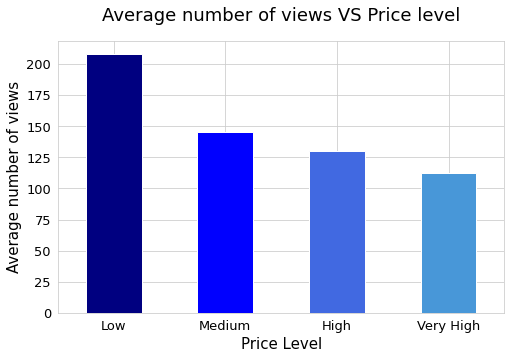

In [56]:
# make bar plot of Average number of views VS Prcie levels

prices_mean.plot(kind="bar",
                 rot=0,
                 figsize=(8,5),
                color = ["navy",'b',"royalblue", "#4897D8" ])




plt.xlabel("Price Level",fontsize=15, color="k")
plt.ylabel("Average number of views",fontsize=15, color="k")
plt.title("Average number of views VS Price level", fontsize=18, color="k", pad=20)
plt.yticks(fontsize=13, color="k")
plt.xticks(fontsize=13, color="k");

The cheapest boats get the most views with average 208 views.Boats in medium price level get 145 average views.
Boats in high price level get 130 average views.The most expensive boats get the least views with average 112 views.

### Answer 1
* From above visualization and information we can conclude that:

   -  The cheapest boats get the most views with average 208 views.
   -  Boats in medium price level get 145 average views.
   -  Boats in high price level get 130 average views.
   -  The most expensive boats get the least views with average 112 views.
   
**(The most expensive boats get the least views and the cheapest boats get the most views on average.)**


### Research Question 2

> #### Which boat type has the most views on average?

In [58]:
# check top 10 boat types which has most views

boat_type_mean = df_clean.groupby("boat_type")["number_of_views_last_7_days"].mean().sort_values(ascending=False)[:10]
boat_type_mean

boat_type
Bowrider,Motor Yacht,Sport Boat             2261.000000
Sport Boat,Wakeboard/Wakesurf,Water ski     1095.000000
Cabin Boat,Fishing Boat,Sport Boat          1049.000000
Hardtop,Motor Yacht                         1048.000000
Bowrider,Deck Boat,Water ski                 888.000000
Bowrider,Wakeboard/Wakesurf                  879.000000
Cabin Boat,Sport Boat,Wakeboard/Wakesurf     867.000000
Motor Yacht,Wakeboard/Wakesurf               826.000000
Deck Boat,Pilothouse,Sport Boat              738.000000
Cabin Boat,Trawler                           737.666667
Name: number_of_views_last_7_days, dtype: float64

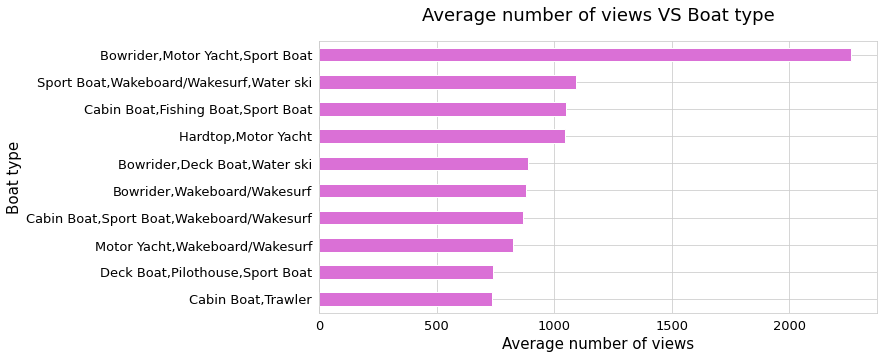

In [59]:
# make bar plot for top 10 boat types vs number of views 

boat_type_mean.sort_values().plot(kind="barh", 
              color = "orchid",
              figsize=(10,5))

plt.ylabel("Boat type",fontsize=15, color="k")
plt.xlabel("Average number of views",fontsize=15, color="k")
plt.title("Average number of views VS Boat type", fontsize=18, color="k", pad=20);
plt.xticks(fontsize=13, color="k")
plt.yticks(fontsize=13, color="k");

### Answer 2
* From above visualization we can conclude that:

   -  "Bowrider,Motor Yacht,Sport" Boats get the most views with average 2261 views.
   -  "Sport Boat,Wakeboard/Wakesurf,Water ski" Boats come in the second place with 1095 views on average.

### Research Question 3

> #### Which boat and engine condition has the most views on average?

In [60]:
# check top 10 boat types which has most views

type_mean = df_clean.groupby("type")["number_of_views_last_7_days"].mean().sort_values(ascending=False)[:10]
type_mean

type
new boat from stock,Hybrid    384.000000
Used boat,Unleaded            242.072361
Display Model,Diesel          234.263158
Used boat,Propane             224.000000
Display Model                 223.666667
Used boat,Gas                 190.900000
Display Model,Unleaded        187.360000
new boat on order,Diesel      179.409836
Used boat,Electric            175.666667
Unleaded                      170.909091
Name: number_of_views_last_7_days, dtype: float64

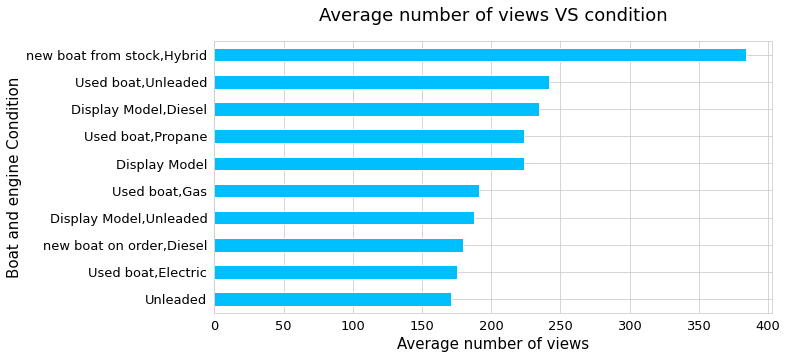

In [61]:
# make bar plot for top 10 types vs number of views 

type_mean.sort_values().plot(kind="barh", 
              color = "deepskyblue",
              figsize=(10,5))

plt.ylabel("Boat and engine Condition",fontsize=15, color="k")
plt.xlabel("Average number of views",fontsize=15, color="k")
plt.title("Average number of views VS condition", fontsize=18, color="k", pad=20);
plt.xticks(fontsize=13, color="k")
plt.yticks(fontsize=13, color="k");

Boat and engine condition: Hybrid new boats get the most views with average 384 views.
Unleaded used boats come in the second place with 242 views on average.

### Answer 3
* From above visualization we can conclude that:
   -  Hybrid new boats get the most views with average 384 views.
   -  Unleaded used boats come in the second place with 242 views on average.

### Research Question 4

> #### Which boat material has the most views on average?




In [377]:
# check boats material average views 

material_mean = df_clean.groupby("material")["number_of_views_last_7_days"].mean().sort_values()
material_mean

material
Rubber                  63.000000
PVC                     85.456812
Hypalon                107.600000
Steel                  133.158679
GRP                    163.993253
Reinforced concrete    169.000000
Aluminium              169.502183
Wood                   222.536170
Thermoplastic          246.666667
Carbon Fiber           265.100000
Plastic                515.298701
Name: number_of_views_last_7_days, dtype: float64

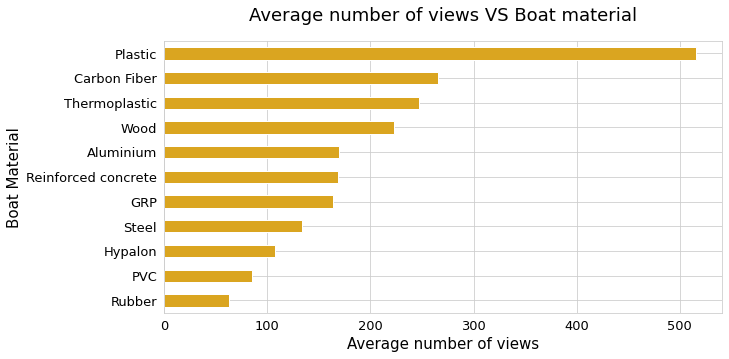

In [488]:
# make bar plot for boats material vs average number of views 

material_mean.plot(kind="barh", 
              color = "goldenrod",
              figsize=(10,5))

plt.ylabel("Boat Material",fontsize=15, color="k")
plt.xlabel("Average number of views",fontsize=15, color="k")
plt.title("Average number of views VS Boat material", fontsize=18, color="k", pad=20);
plt.xticks(fontsize=13, color="k")
plt.yticks(fontsize=13, color="k");

### Answer 4

* From above visualization we can conclude that:

   - Plastic boats get the most views with average 515 views.
   - Carbon Fiber boats come in the second place with 265 views on average.
   - Rubber and PVC boats get the least views with average 63 and 85 views respectively.

### Research Question 5

> #### Are there common features among the most viewed boats?


In [480]:
# check the common characteristics for quantitative variables on each views level


levels_features = df_clean.groupby("views_level").agg({"price_in_euro":"mean",
                                                     "length":"mean",
                                                     "width":"mean"})
levels_features

,price_in_euro,length,width
views_level,,,
Low,306688.058552,12.533124,3.760860
Medium,331775.429545,12.358767,3.696139
High,297021.508799,11.422328,3.501307
Very High,277990.211799,9.924699,3.111706


Very high views level has the smalest boat length and width average. 
Low views level has the largest boat length and width average.


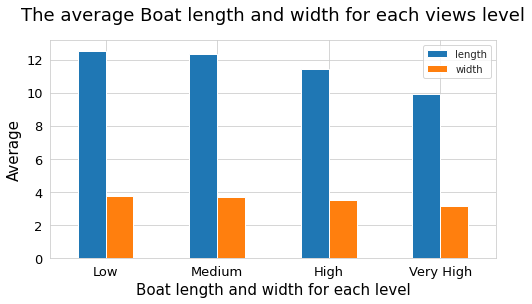

In [487]:
# bar chart for The average Boat length and width for each views level

levels_features[["length", "width" ]].plot(kind="bar",
                                           figsize=(8,4),
                                           rot=0)

plt.ylabel("Average",fontsize=15, color="k")
plt.xlabel("Boat length and width for each level",fontsize=15, color="k")
plt.title("The average Boat length and width for each views level", fontsize=18, color="k", pad=20);
plt.xticks(fontsize=13, color="k")
plt.yticks(fontsize=13, color="k");

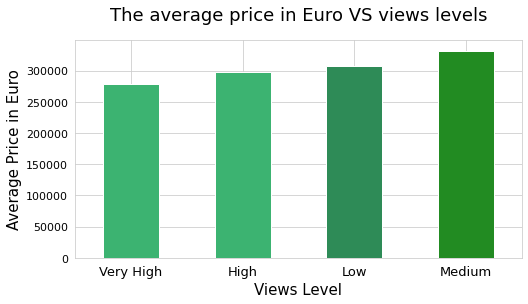

In [501]:
# The average Price for each views level

levels_features.price_in_euro.sort_values().plot(kind="bar",
                                                 figsize=(8,4),
                                                 rot=0,
                                                color = [ "mediumseagreen","mediumseagreen", "seagreen","forestgreen"])

plt.ylabel("Average Price in Euro",fontsize=15, color="k")
plt.xlabel("Views Level",fontsize=15, color="k")
plt.title("The average price in Euro VS views levels", fontsize=18, color="k", pad=20)
plt.xticks(fontsize=13, color="k")
plt.yticks(fontsize=11, color="k");

Very high views level has the least expensive boat price on average.
Medium views level has the most expensive boat price on average.

In [512]:
# check the common characteristics for categorical variables on each views level

df_clean.groupby("views_level").describe(include= 'category').iloc[:, :12]

boat_type                           type         \
                count unique          top freq count unique   
views_level                                                   
Low              2514     33  Motor Yacht  747  2511     16   
Medium           2481     33  Motor Yacht  755  2481     20   
High             2447     41  Motor Yacht  717  2445     19   
Very High        2446    116  Motor Yacht  501  2445     21   

                                      material                    
                            top  freq    count unique  top  freq  
views_level                                                       
Low            Used boat,Diesel  1241     1989      9  GRP  1205  
Medium         Used boat,Diesel  1165     2006      9  GRP  1277  
High           Used boat,Diesel   981     2000     10  GRP  1385  
Very High    Used boat,Unleaded   846     2144      8  GRP  1617

### Answer 5

* From above visualisation we can conclude that:

   - Very high views level has the smalest boat length and width average.
   - Low views level has the largest boat length and width average.
   - Very high views level has the least expensive boat price on average.
   - Medium views level has the most expensive boat price on average.
   - The most frequant boat type is motor yacht for all views levels.
   - The most frequant engine condition is "Used boat,Diesel" for low, medium and high views levels and "Used boat,Unleaded" for very high views level.
   - The most frequant boat material is "GRP" for all views levels.
   

<a id='conclusions'></a>
## Conclusions


> **1.  The cheapest boats get the most views and the most expensive boats get the least views on average.**

> **2. "Bowrider,Motor Yacht,Sport" Boats get the most views on average.**

> **3. Plastic,Carbon Fiber and Thermo Plastic boats get the most views respectively.**

> **4. Rubber,PVC boats get the least views respectively.**

> **5. The smaller the boat, the more views it gets:**
    > * Boats with the smalest length and width average get the most views.
    >*  Boats with the largest length and width average get the least views.

> **6. Very high views level has the least expensive boat price on average.**

> **7. The most frequant boat type is motor yacht for all views levels.**

> **8. The most frequant boat material is "GRP" for all views levels.**

> **9. The most frequant engine condition for very high views level is "Used 
boat,Unleaded".**



# Limitation and recommendations


> **1. There are a lot of empty values on this data set (Nans) especially on Manufacturing and Material columns.**

> **2. The minimum boat width is 0.01 Meter which is obviously a typo issue.**

> **3. There are 551 observations with value 0 on Year Built column.**


## It's very important to give these points more attention in the future because they may affect our results accuracy and we need avoid such mistakes.
